In [2]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import requests
import ssl

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

reviewlist = []

def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup


def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.co.in:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

for x in range(1,999):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Lite-128GB-Storage/product-reviews/B09WQYFLRX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if len(reviewlist)==2000:
        break
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
20
Getting page: 4
20
Getting page: 5
20
Getting page: 6
30
Getting page: 7
30
Getting page: 8
40
Getting page: 9
50
Getting page: 10
60
Getting page: 11
60
Getting page: 12
70
Getting page: 13
70
Getting page: 14
80
Getting page: 15
80
Getting page: 16
80
Getting page: 17
80
Getting page: 18
90
Getting page: 19
90
Getting page: 20
90
Getting page: 21
100
Getting page: 22
110
Getting page: 23
110
Getting page: 24
120
Getting page: 25
120
Getting page: 26
130
Getting page: 27
130
Getting page: 28
130
Getting page: 29
130
Getting page: 30
130
Getting page: 31
130
Getting page: 32
130
Getting page: 33
140
Getting page: 34
140
Getting page: 35
140
Getting page: 36
150
Getting page: 37
160
Getting page: 38
170
Getting page: 39
180
Getting page: 40
180
Getting page: 41
180
Getting page: 42
180
Getting page: 43
180
Getting page: 44
180
Getting page: 45
180
Getting page: 46
180
Getting page: 47
190
Getting page: 48
190
Getting page: 49
200


Getting page: 372
1840
Getting page: 373
1850
Getting page: 374
1850
Getting page: 375
1850
Getting page: 376
1860
Getting page: 377
1860
Getting page: 378
1870
Getting page: 379
1880
Getting page: 380
1880
Getting page: 381
1890
Getting page: 382
1890
Getting page: 383
1890
Getting page: 384
1900
Getting page: 385
1910
Getting page: 386
1910
Getting page: 387
1910
Getting page: 388
1910
Getting page: 389
1910
Getting page: 390
1920
Getting page: 391
1920
Getting page: 392
1920
Getting page: 393
1930
Getting page: 394
1930
Getting page: 395
1940
Getting page: 396
1940
Getting page: 397
1940
Getting page: 398
1950
Getting page: 399
1950
Getting page: 400
1960
Getting page: 401
1970
Getting page: 402
1980
Getting page: 403
1990
Getting page: 404
2000


In [4]:
reviewlist[0]

{'product': 'Amazon.in:Customer reviews: OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, 128GB Storage)',
 'title': 'One Plus Nord Ce2 Lite 5g',
 'rating': 4.0,
 'body': "A Midrange phone from oneplus. why I choose this phone is only because of the brand value we have more other option like Vivo t1 / realme 9 /9 Pro / Oppo/ Motorola but the oneplus has their own premium feel the reason why I have given only four star.......1). The Amoled display is not there but it is not important.2) The wide angle lens is also not there.3) they have removed alert slider. Otherwise the phone is perfect I am satisfied with this device 95% you can definitely go for it. the important thing is that red cable is available which is a signature of oneplus mobile also the oxygen OS is perfect I like it and it's give extremely performance that fill you like a { Makhan Malai }.Thank you ❤️\u200d🔥"}

In [5]:
product_arr = []
title_arr = []
rating_arr = []
body_arr = []
for ele in reviewlist:
    product_arr.append(ele['product'])
    title_arr.append(ele['title'])
    rating_arr.append(float(ele['rating']))
    body_arr.append(ele['body'])

In [6]:
review_df = pd.DataFrame({'Product':product_arr,'Title':title_arr,'Rating':rating_arr,'Body':body_arr},columns=['Product','Title','Rating','Body'])

In [7]:
review_df

,Product,Title,Rating,Body
0,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,One Plus Nord Ce2 Lite 5g,4.0,A Midrange phone from oneplus. why I choose th...
1,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good Phone (Just Price is Little Higher),4.0,I am writing this review after using 5 Days th...
2,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,This phone is good,4.0,OnePlus is the good company this phone is batt...
3,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Camera,4.0,Front camera is below average except of that e...
4,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,It's only a Budget deal with OnePlus. Everythi...,4.0,"Camera Quality was superb, Phone Running very ..."
...,...,...,...,...
1995,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Worth for money,4.0,Don't have extra unnecessary apps.Camera very ...
1996,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Not worth the money,2.0,Better phone in this range..hang problem... pr...
1997,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Worst display among all the phones I used,2.0,You will loose you eyesight if you use this ph...
1998,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good phone in this range. Go for it,5.0,"I like it's quality, noise, battery backup and..."


# Rating Distribution

<AxesSubplot:>

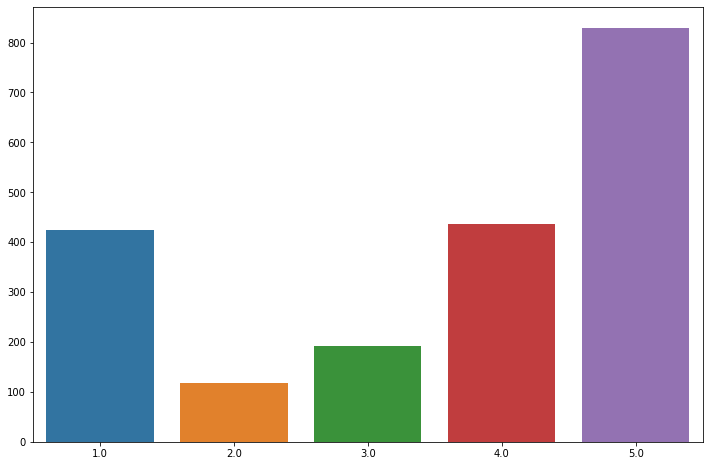

In [8]:
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(review_df.Rating.value_counts().keys(),review_df.Rating.value_counts().values)

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [10]:
def show_score(ele):
    body = ele.Body
    score = sia.polarity_scores(body)
    neg,neu,pos,cmp = score['neg'],score['neu'],score['pos'],score['compound']
    print("Review Text:-",ele.Body,end='\n\n')
    print("Scores :-----------------------------------------------------------------------------------------------------------------------",end="\n\n")
    print("Negativity Score ----> ",neg)
    print("Neutrality Score ----> ",neu)
    print("Positivity Score ----> ",pos)
    print("Compound Score   ---->",cmp)

In [11]:
show_score(review_df.loc[0])

Review Text:- A Midrange phone from oneplus. why I choose this phone is only because of the brand value we have more other option like Vivo t1 / realme 9 /9 Pro / Oppo/ Motorola but the oneplus has their own premium feel the reason why I have given only four star.......1). The Amoled display is not there but it is not important.2) The wide angle lens is also not there.3) they have removed alert slider. Otherwise the phone is perfect I am satisfied with this device 95% you can definitely go for it. the important thing is that red cable is available which is a signature of oneplus mobile also the oxygen OS is perfect I like it and it's give extremely performance that fill you like a { Makhan Malai }.Thank you ❤️‍🔥

Scores :-----------------------------------------------------------------------------------------------------------------------

Negativity Score ---->  0.0
Neutrality Score ---->  0.771
Positivity Score ---->  0.229
Compound Score   ----> 0.9864


In [12]:
body_neg = []
body_neu = []
body_pos = []
body_cmp = []
for row in review_df.iterrows():
    res = sia.polarity_scores(row[1]['Body'])
    body_neg.append(res['neg'])
    body_neu.append(res['neu'])
    body_pos.append(res['pos'])
    body_cmp.append(res['compound'])

In [13]:
review_df['body_neg'] = body_neg
review_df['body_neu'] = body_neu
review_df['body_pos'] = body_pos
review_df['body_cmp'] = body_cmp

# 1 - Compound Sentiment Score vs Rating

<AxesSubplot:xlabel='Rating', ylabel='body_cmp'>

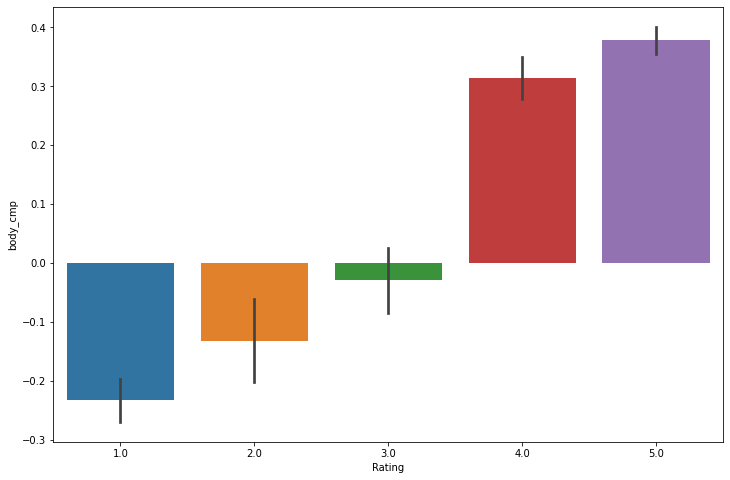

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x='Rating',y='body_cmp',data=review_df)

# 2 - Positive Sentiment Score vs Rating

<AxesSubplot:xlabel='Rating', ylabel='body_pos'>

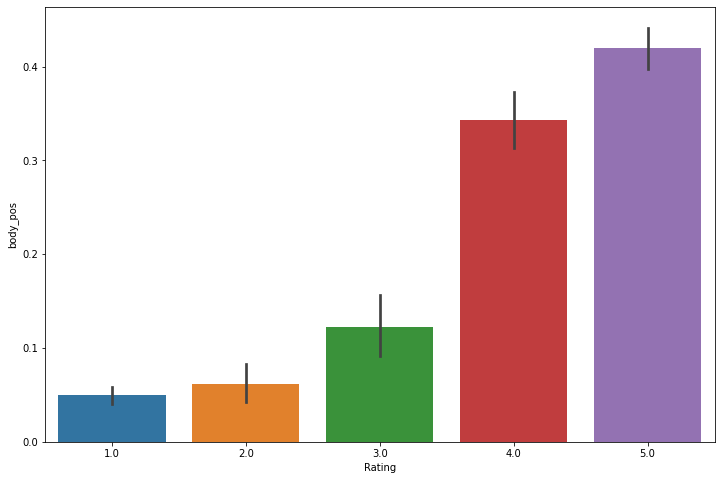

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x='Rating',y='body_pos',data=review_df)

# 3 - Negative Sentiment Score vs Rating

<AxesSubplot:xlabel='Rating', ylabel='body_neg'>

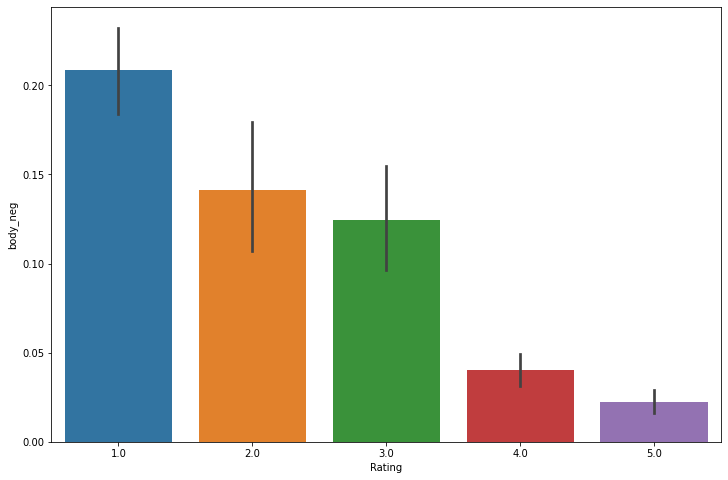

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='Rating',y='body_neg',data=review_df)

# 4 - Neutral Sentiment Score vs Rating 

<AxesSubplot:xlabel='Rating', ylabel='body_neu'>

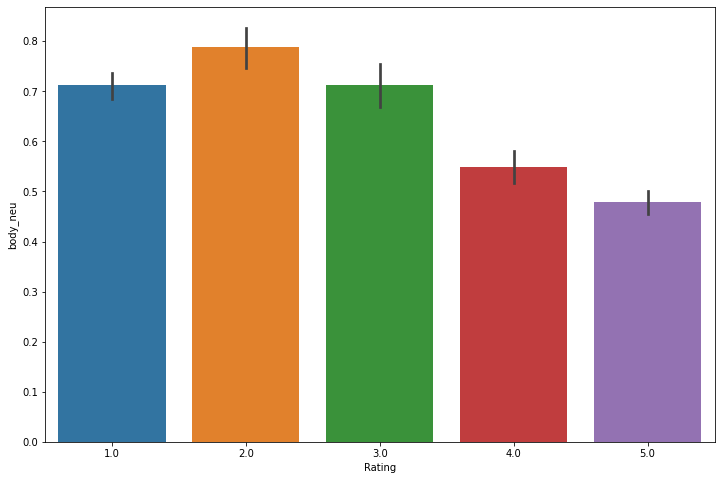

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x='Rating',y='body_neu',data=review_df)

# As we can see Positivity scores,Negativity scores are matching the Rating given by user 
# This can be considered as first success of this project.

Text(0.5, 1.0, 'Compound X Rating')

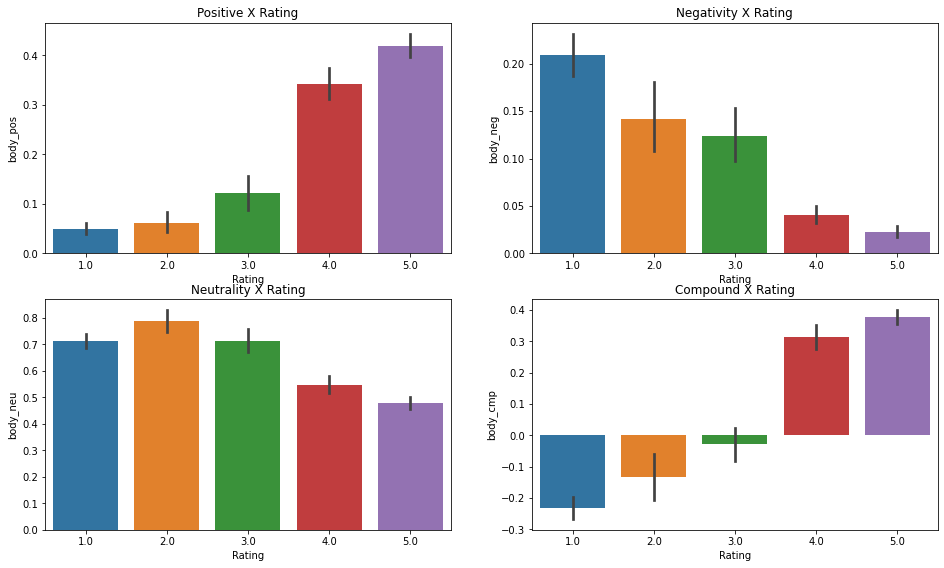

In [18]:
fig, axes = plt.subplots(2,2,figsize=(16,8))
plt.subplots_adjust(bottom=0)
sns.barplot(ax=axes[0,0],x='Rating',y='body_pos',data=review_df)
axes[0,0].set_title('Positive X Rating')
sns.barplot(ax=axes[0,1],x='Rating',y='body_neg',data=review_df)
axes[0,1].set_title('Negativity X Rating')
sns.barplot(ax=axes[1,0],x='Rating',y='body_neu',data=review_df)
axes[1,0].set_title('Neutrality X Rating')
sns.barplot(ax=axes[1,1],x='Rating',y='body_cmp',data=review_df)
axes[1,1].set_title('Compound X Rating')

In [19]:
from wordcloud import WordCloud

In [23]:
text = review_df.Body[1]
text

'I am writing this review after using 5 Days this phone & 1.5 Month use of Motorola Moto G62.Performance, Camera, Battery Life, functionality of this phone is more & far Better than Moto G62.Pros.  Performance, Battery, Camera, Fast Charging (0-100% Charging in 1 hours & 10 Minutes (this is real data after charging 3 times after purchasing)).Cons.  No Measure Cons.  1- Just Price is Little higher.  2-Just some Software functions like Small Menu Apps Grid (Matrix) Bar, Font Style & Small Font Size looking like Large(That should have to be smaller than given.  There should have to option for the reduction of Small Apps Grid (Matrix) Size.'

In [24]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

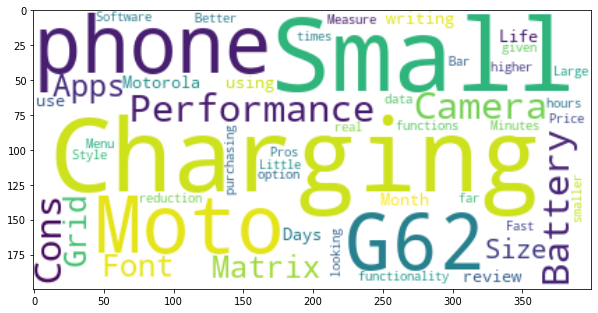

In [25]:
plt.figure(figsize=(10,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [26]:
all_review_text = ''
for row in review_df.iterrows():
    all_review_text += row[1][3]

In [27]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_review_text)

# Here, We are collecting all reviews in a single string and generating wordcloud out of it.

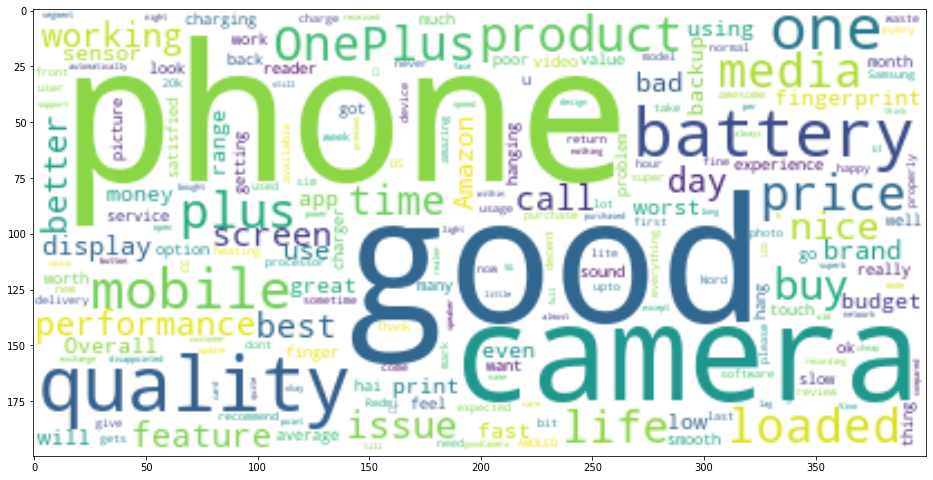

In [28]:
plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

<AxesSubplot:>

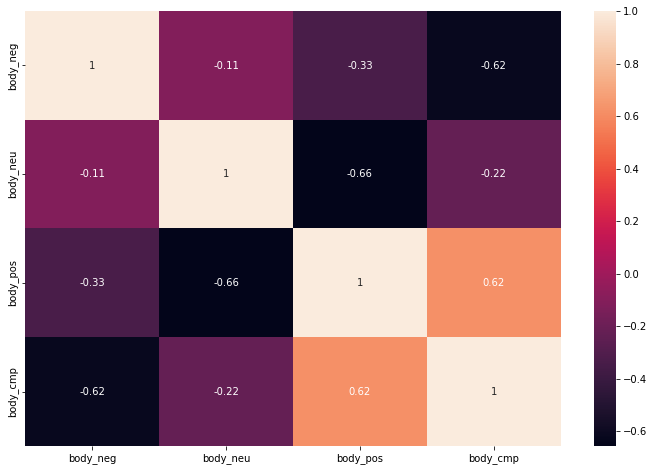

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(review_df.drop(['Rating'],axis=1).corr(),annot=True)

# Cleaning data 

#  1 > Removing Punctuations 

In [30]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [32]:
review_df['wo_punct'] = review_df['Body'].apply(remove_punctuation)

In [33]:
review_df.head()

,Product,Title,Rating,Body,body_neg,body_neu,body_pos,body_cmp,wo_punct
0,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,One Plus Nord Ce2 Lite 5g,4.0,A Midrange phone from oneplus. why I choose th...,0.000,0.771,0.229,0.9864,A Midrange phone from oneplus why I choose thi...
1,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good Phone (Just Price is Little Higher),4.0,I am writing this review after using 5 Days th...,0.021,0.902,0.078,0.7165,I am writing this review after using 5 Days th...
2,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,This phone is good,4.0,OnePlus is the good company this phone is batt...,0.000,0.817,0.183,0.8225,OnePlus is the good company this phone is batt...
3,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Camera,4.0,Front camera is below average except of that e...,0.000,0.723,0.277,0.7096,Front camera is below average except of that e...
4,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,It's only a Budget deal with OnePlus. Everythi...,4.0,"Camera Quality was superb, Phone Running very ...",0.075,0.759,0.166,0.3054,Camera Quality was superb Phone Running very S...


# 2 > Tokenization 

In [34]:
import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split

In [35]:
review_df['tokenized'] = review_df['wo_punct'].apply(tokenize)

In [36]:
review_df.head()

,Product,Title,Rating,Body,body_neg,body_neu,body_pos,body_cmp,wo_punct,tokenized
0,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,One Plus Nord Ce2 Lite 5g,4.0,A Midrange phone from oneplus. why I choose th...,0.000,0.771,0.229,0.9864,A Midrange phone from oneplus why I choose thi...,"[A, Midrange, phone, from, oneplus, why, I, ch..."
1,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good Phone (Just Price is Little Higher),4.0,I am writing this review after using 5 Days th...,0.021,0.902,0.078,0.7165,I am writing this review after using 5 Days th...,"[I, am, writing, this, review, after, using, 5..."
2,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,This phone is good,4.0,OnePlus is the good company this phone is batt...,0.000,0.817,0.183,0.8225,OnePlus is the good company this phone is batt...,"[OnePlus, is, the, good, company, this, phone,..."
3,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Camera,4.0,Front camera is below average except of that e...,0.000,0.723,0.277,0.7096,Front camera is below average except of that e...,"[Front, camera, is, below, average, except, of..."
4,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,It's only a Budget deal with OnePlus. Everythi...,4.0,"Camera Quality was superb, Phone Running very ...",0.075,0.759,0.166,0.3054,Camera Quality was superb Phone Running very S...,"[Camera, Quality, was, superb, Phone, Running,..."


# 3 > Removing Stop words

In [37]:
from nltk.corpus import stopwords
StopWords = stopwords.words('english')
print(StopWords[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


In [38]:
def remove_stopwords(text):
    text=[word for word in text if word not in StopWords]
    return text
review_df['wo_stopwords'] = review_df['tokenized'].apply(lambda x: remove_stopwords(x))
review_df.head()

,Product,Title,Rating,Body,body_neg,body_neu,body_pos,body_cmp,wo_punct,tokenized,wo_stopwords
0,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,One Plus Nord Ce2 Lite 5g,4.0,A Midrange phone from oneplus. why I choose th...,0.000,0.771,0.229,0.9864,A Midrange phone from oneplus why I choose thi...,"[A, Midrange, phone, from, oneplus, why, I, ch...","[A, Midrange, phone, oneplus, I, choose, phone..."
1,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good Phone (Just Price is Little Higher),4.0,I am writing this review after using 5 Days th...,0.021,0.902,0.078,0.7165,I am writing this review after using 5 Days th...,"[I, am, writing, this, review, after, using, 5...","[I, writing, review, using, 5, Days, phone, 15..."
2,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,This phone is good,4.0,OnePlus is the good company this phone is batt...,0.000,0.817,0.183,0.8225,OnePlus is the good company this phone is batt...,"[OnePlus, is, the, good, company, this, phone,...","[OnePlus, good, company, phone, batter, use, m..."
3,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Camera,4.0,Front camera is below average except of that e...,0.000,0.723,0.277,0.7096,Front camera is below average except of that e...,"[Front, camera, is, below, average, except, of...","[Front, camera, average, except, everything, f..."
4,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,It's only a Budget deal with OnePlus. Everythi...,4.0,"Camera Quality was superb, Phone Running very ...",0.075,0.759,0.166,0.3054,Camera Quality was superb Phone Running very S...,"[Camera, Quality, was, superb, Phone, Running,...","[Camera, Quality, superb, Phone, Running, Smoo..."


In [39]:
from transformers import pipeline

# Here we have used Hugging Face 's pre-trained model to classify our reviews in different emotions.

# "arpanghoshal/EmoRoBERTa" model is trained over dataset of 58000 Reddit comments with 28 emotion labels.

# Different target labels from the datasets :- 

# admiration -------- amusement -------- anger -------- annoyance
# approval -------- caring -------- confusion -------- curiosity -------- desire
# disappointment -------- disapproval -------- disgust -------- embarrassment
# excitement -------- fear -------- gratitude -------- grief -------- joy
# love -------- nervousness -------- optimism -------- pride -------- realization
# relief -------- remorse -------- sadness -------- surprise + neutral

In [40]:
emotion = pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [41]:
# Example Emotion
emotion_label = emotion("littlebitcostlierthanitscompetitersbutoverallperfomanceisgoodlooksareamazing")
emotion_label

[{'label': 'admiration', 'score': 0.7736167311668396}]

In [42]:
type(emotion_label)

list

In [43]:
def get_emotion(ele_list):
    sentence = " ".join(ele_list)
    emotions_and_score = emotion(sentence)[0]
    return emotions_and_score['label']

In [44]:
review_df['body_emotion'] = review_df['wo_stopwords'].apply(get_emotion)

In [45]:
review_df.head()

,Product,Title,Rating,Body,body_neg,body_neu,body_pos,body_cmp,wo_punct,tokenized,wo_stopwords,body_emotion
0,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,One Plus Nord Ce2 Lite 5g,4.0,A Midrange phone from oneplus. why I choose th...,0.000,0.771,0.229,0.9864,A Midrange phone from oneplus why I choose thi...,"[A, Midrange, phone, from, oneplus, why, I, ch...","[A, Midrange, phone, oneplus, I, choose, phone...",gratitude
1,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Good Phone (Just Price is Little Higher),4.0,I am writing this review after using 5 Days th...,0.021,0.902,0.078,0.7165,I am writing this review after using 5 Days th...,"[I, am, writing, this, review, after, using, 5...","[I, writing, review, using, 5, Days, phone, 15...",neutral
2,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,This phone is good,4.0,OnePlus is the good company this phone is batt...,0.000,0.817,0.183,0.8225,OnePlus is the good company this phone is batt...,"[OnePlus, is, the, good, company, this, phone,...","[OnePlus, good, company, phone, batter, use, m...",neutral
3,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,Camera,4.0,Front camera is below average except of that e...,0.000,0.723,0.277,0.7096,Front camera is below average except of that e...,"[Front, camera, is, below, average, except, of...","[Front, camera, average, except, everything, f...",admiration
4,Amazon.in:Customer reviews: OnePlus Nord CE 2 ...,It's only a Budget deal with OnePlus. Everythi...,4.0,"Camera Quality was superb, Phone Running very ...",0.075,0.759,0.166,0.3054,Camera Quality was superb Phone Running very S...,"[Camera, Quality, was, superb, Phone, Running,...","[Camera, Quality, superb, Phone, Running, Smoo...",admiration


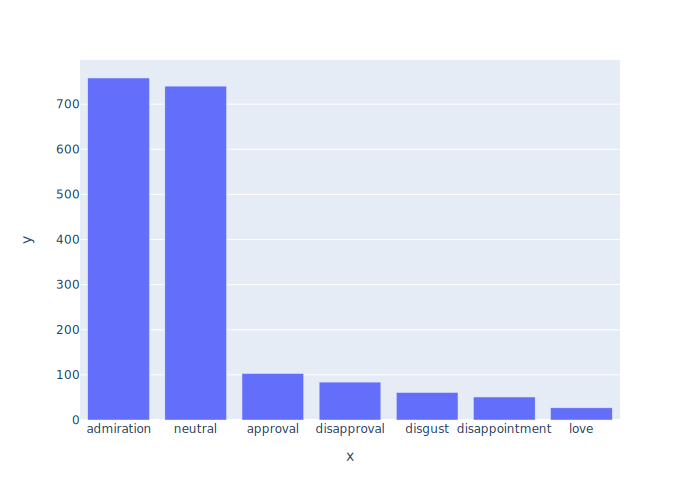

In [46]:
from plotly.express import bar
fig = bar(y=review_df['body_emotion'].value_counts().values.tolist()[:7], x=review_df['body_emotion'].value_counts().keys().tolist()[:7])
fig.show("svg")

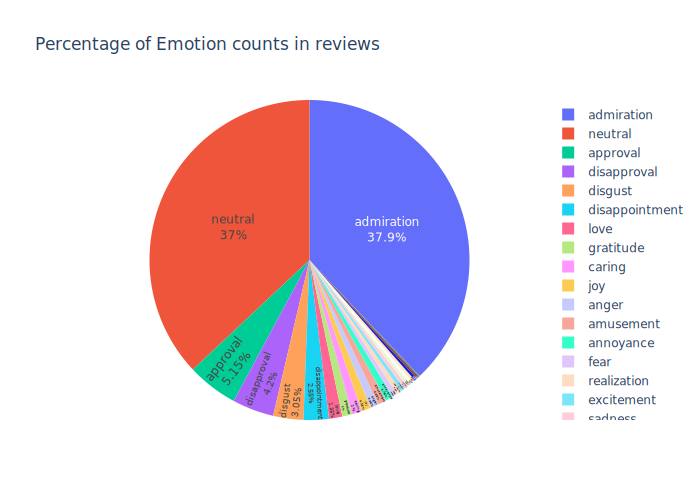

In [48]:
from plotly.express import pie
fig = pie(review_df, values=review_df['body_emotion'].value_counts().values.tolist(), names=review_df['body_emotion'].value_counts().keys().tolist(),
             title='Percentage of Emotion counts in reviews',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show("svg")

# Thank you !!!